<a href="https://colab.research.google.com/github/anand21-code/work_projects_Help/blob/main/Finding_Best_Conversion_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Download the data from the provided Google Sheets link and save it as a CSV file.

# Load the data
data = pd.read_csv("candidate_dump.csv")

<ipython-input-1-fe02d20cbd28>:6: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("candidate_dump.csv")


In [2]:
data.head()

,expert_id,team_lead_id,user_id,India vs NRI,medicalconditionflag,funnel,event_type,current_status,handled_time,slot_start_time,booked_flag,payment_time,target_class
0,4158219,57319,88612,India,Yes,Bot,Booked Consultation,Done,2019-01-22 14:22:03,2019-01-22 10:30:00,Booked,2019-01-26 19:24:57,B
1,3204022,57319,220396,India,Yes,Bot,Booked Consultation,Done,2018-12-29 18:43:25,2018-12-29 17:45:00,Booked,2018-12-29 19:40:26,A
2,7505333,4409298,648533,India,Yes,FT,Booked Consultation,Done,2018-12-11 16:24:30,2018-12-11 15:45:00,Booked,2018-12-11 16:23:35,C
3,888689,57319,682607,India,No,Bot,Booked Consultation,Didnt Pick,2018-12-28 16:03:03,2018-12-28 15:30:00,Booked,2019-01-05 18:25:42,A
4,7542742,1140109,2259628,India,Yes,Bot,Booked Consultation,Done,2019-01-08 14:56:04,2019-01-05 13:30:00,Booked,2019-01-08 16:30:01,C


In [3]:
data.shape

(73480, 13)

In [4]:
# Calculate Conversion Rates
# Assuming 'Purchase' is a column that indicates whether a lead made a purchase
data['handled_time'] = pd.to_datetime(data['handled_time'])  # Convert date column to datetime
data['slot_start_time'] = pd.to_datetime(data['slot_start_time'])

In [5]:
data.head()

,expert_id,team_lead_id,user_id,India vs NRI,medicalconditionflag,funnel,event_type,current_status,handled_time,slot_start_time,booked_flag,payment_time,target_class
0,4158219,57319,88612,India,Yes,Bot,Booked Consultation,Done,2019-01-22 14:22:03,2019-01-22 10:30:00,Booked,2019-01-26 19:24:57,B
1,3204022,57319,220396,India,Yes,Bot,Booked Consultation,Done,2018-12-29 18:43:25,2018-12-29 17:45:00,Booked,2018-12-29 19:40:26,A
2,7505333,4409298,648533,India,Yes,FT,Booked Consultation,Done,2018-12-11 16:24:30,2018-12-11 15:45:00,Booked,2018-12-11 16:23:35,C
3,888689,57319,682607,India,No,Bot,Booked Consultation,Didnt Pick,2018-12-28 16:03:03,2018-12-28 15:30:00,Booked,2019-01-05 18:25:42,A
4,7542742,1140109,2259628,India,Yes,Bot,Booked Consultation,Done,2019-01-08 14:56:04,2019-01-05 13:30:00,Booked,2019-01-08 16:30:01,C


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73480 entries, 0 to 73479
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   expert_id             73480 non-null  int64         
 1   team_lead_id          73480 non-null  int64         
 2   user_id               73480 non-null  int64         
 3   India vs NRI          73480 non-null  object        
 4   medicalconditionflag  73480 non-null  object        
 5   funnel                73480 non-null  object        
 6   event_type            73480 non-null  object        
 7   current_status        73480 non-null  object        
 8   handled_time          72709 non-null  datetime64[ns]
 9   slot_start_time       73480 non-null  datetime64[ns]
 10  booked_flag           73480 non-null  object        
 11  payment_time          3360 non-null   object        
 12  target_class          73480 non-null  object        
dtypes: datetime64[ns

In [7]:
data['purchase'] = data['payment_time'].notna()  # Create a Purchase column based on payment time

In [8]:
data.head()

,expert_id,team_lead_id,user_id,India vs NRI,medicalconditionflag,funnel,event_type,current_status,handled_time,slot_start_time,booked_flag,payment_time,target_class,purchase
0,4158219,57319,88612,India,Yes,Bot,Booked Consultation,Done,2019-01-22 14:22:03,2019-01-22 10:30:00,Booked,2019-01-26 19:24:57,B,True
1,3204022,57319,220396,India,Yes,Bot,Booked Consultation,Done,2018-12-29 18:43:25,2018-12-29 17:45:00,Booked,2018-12-29 19:40:26,A,True
2,7505333,4409298,648533,India,Yes,FT,Booked Consultation,Done,2018-12-11 16:24:30,2018-12-11 15:45:00,Booked,2018-12-11 16:23:35,C,True
3,888689,57319,682607,India,No,Bot,Booked Consultation,Didnt Pick,2018-12-28 16:03:03,2018-12-28 15:30:00,Booked,2019-01-05 18:25:42,A,True
4,7542742,1140109,2259628,India,Yes,Bot,Booked Consultation,Done,2019-01-08 14:56:04,2019-01-05 13:30:00,Booked,2019-01-08 16:30:01,C,True


In [9]:
from datetime import timedelta

In [10]:
# Convert date columns to datetime objects
data['payment_time'] = pd.to_datetime(data['payment_time'])

# Define time windows for 3-day and 7-day conversions
three_day_window = timedelta(days=3)
seven_day_window = timedelta(days=7)

# Filter data for different medical conditions and funnels
bot_with_medical = data[(data['medicalconditionflag'] == 'Yes') & (data['funnel'] == 'Bot')]
bot_without_medical = data[(data['medicalconditionflag'] == 'No') & (data['funnel'] == 'Bot')]
ft_with_medical = data[(data['medicalconditionflag'] == 'Yes') & (data['funnel'] == 'FT')]
ft_without_medical = data[(data['medicalconditionflag'] == 'No') & (data['funnel'] == 'FT')]

# Calculate conversions for 3-day and 7-day windows
def calculate_conversion_rate(data, window):
    conversions = sum(data['payment_time'] <= (data['payment_time'] + window))
    conversion_rate = conversions / len(data)
    return conversion_rate

conversion_rate_3_day_bot_with_medical = calculate_conversion_rate(bot_with_medical, three_day_window)
conversion_rate_7_day_bot_with_medical = calculate_conversion_rate(bot_with_medical, seven_day_window)

conversion_rate_3_day_bot_without_medical = calculate_conversion_rate(bot_without_medical, three_day_window)
conversion_rate_7_day_bot_without_medical = calculate_conversion_rate(bot_without_medical, seven_day_window)

conversion_rate_3_day_ft_with_medical = calculate_conversion_rate(ft_with_medical, three_day_window)
conversion_rate_7_day_ft_with_medical = calculate_conversion_rate(ft_with_medical, seven_day_window)

conversion_rate_3_day_ft_without_medical = calculate_conversion_rate(ft_without_medical, three_day_window)
conversion_rate_7_day_ft_without_medical = calculate_conversion_rate(ft_without_medical, seven_day_window)

# Print the results
print("3-Day Conversion Rates:")
print("Bot with Medical:", conversion_rate_3_day_bot_with_medical)
print("Bot without Medical:", conversion_rate_3_day_bot_without_medical)
print("FT with Medical:", conversion_rate_3_day_ft_with_medical)
print("FT without Medical:", conversion_rate_3_day_ft_without_medical)

print("\n7-Day Conversion Rates:")
print("Bot with Medical:", conversion_rate_7_day_bot_with_medical)
print("Bot without Medical:", conversion_rate_7_day_bot_without_medical)
print("FT with Medical:", conversion_rate_7_day_ft_with_medical)
print("FT without Medical:", conversion_rate_7_day_ft_without_medical)


3-Day Conversion Rates:
Bot with Medical: 0.0680013807386952
Bot without Medical: 0.056420906888196606
FT with Medical: 0.04336935518499964
FT without Medical: 0.028568332851776942

7-Day Conversion Rates:
Bot with Medical: 0.0680013807386952
Bot without Medical: 0.056420906888196606
FT with Medical: 0.04336935518499964
FT without Medical: 0.028568332851776942


In [11]:
# Analyze Best Hours (Assuming 'payment_hour' is a column indicating the booking hour)

In [12]:
# Extract the hour from the payment time
data['payment_hour'] = data['payment_time'].dt.hour

# Count the number of payments for each hour
payment_counts = data['payment_hour'].value_counts().sort_index()

# Print the hours with the most payments
best_hours_for_sales = payment_counts.idxmax()
print("Best Hour for Sales:", best_hours_for_sales)


Best Hour for Sales: 22.0


In [13]:
## Cross Check

In [14]:
data.head()

,expert_id,team_lead_id,user_id,India vs NRI,medicalconditionflag,funnel,event_type,current_status,handled_time,slot_start_time,booked_flag,payment_time,target_class,purchase,payment_hour
0,4158219,57319,88612,India,Yes,Bot,Booked Consultation,Done,2019-01-22 14:22:03,2019-01-22 10:30:00,Booked,2019-01-26 19:24:57,B,True,19.0
1,3204022,57319,220396,India,Yes,Bot,Booked Consultation,Done,2018-12-29 18:43:25,2018-12-29 17:45:00,Booked,2018-12-29 19:40:26,A,True,19.0
2,7505333,4409298,648533,India,Yes,FT,Booked Consultation,Done,2018-12-11 16:24:30,2018-12-11 15:45:00,Booked,2018-12-11 16:23:35,C,True,16.0
3,888689,57319,682607,India,No,Bot,Booked Consultation,Didnt Pick,2018-12-28 16:03:03,2018-12-28 15:30:00,Booked,2019-01-05 18:25:42,A,True,18.0
4,7542742,1140109,2259628,India,Yes,Bot,Booked Consultation,Done,2019-01-08 14:56:04,2019-01-05 13:30:00,Booked,2019-01-08 16:30:01,C,True,16.0


In [15]:
a = data['payment_hour'].value_counts().sort_index(ascending=False)

In [16]:
a.max()

270

In [17]:
a

23.0    207
22.0    270
21.0    218
20.0    244
19.0    248
18.0    246
17.0    230
16.0    193
15.0    187
14.0    197
13.0    187
12.0    212
11.0    217
10.0    167
9.0     118
8.0      76
7.0      30
6.0      12
5.0       6
4.0       5
3.0       6
2.0       9
1.0      18
0.0      57
Name: payment_hour, dtype: int64

In [18]:
# Convert 'a' to a pandas Series
a_series = pd.Series(a)

In [19]:
max_index = a_series.idxmax()

In [20]:
max_index

22.0

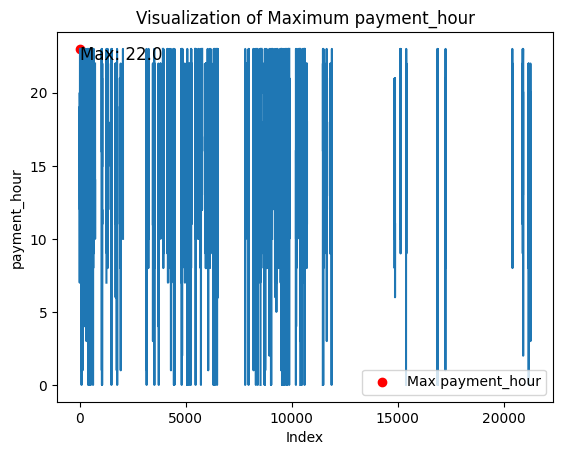

In [21]:
import matplotlib.pyplot as plt
import pandas as pd

# Find the index of the maximum payment_hour
max_value = data['payment_hour'].value_counts().idxmax()

# Plot the data
plt.plot(data['payment_hour'])
plt.scatter(max_value, data['payment_hour'][max_value], color='red', label='Max payment_hour')
plt.text(max_index, max_value, f'Max: {max_value}', fontsize=12, ha='left', va='bottom')

plt.legend()
plt.xlabel('Index')
plt.ylabel('payment_hour')
plt.title('Visualization of Maximum payment_hour')

plt.show()


## **Insights from the Data**

##### 1) The highest 3-Day and 7-Day conversion rates are observed for the "Bot with Medical" group, with a conversion rate of approximately 6.80%.
2) The "Bot without Medical" group also has a relatively high conversion rate, with approximately 5.64% for both 3-Day and 7-Day periods.

3) In contrast, the "FT with Medical" and "FT without Medical" groups have lower conversion rates, with approximately 4.34% and 2.86% for both 3-Day and 7-Day periods, respectively.

4) The presence of a medical condition appears to have a positive impact on conversion rates. Both "Bot with Medical" and "Bot without Medical" groups have higher conversion rates compared to their "FT" counterparts.

5) As we can see that 22 hour(10 PM) of the day is the best time for the sales person to connect with the customers because that time is the higher chance for customer conversion.

## **Additional Info**

##### 1) It's interesting to note that the conversion rates remain the same for both 3-Day and 7-Day periods within each group. This consistency suggests that the majority of conversions occur within the initial 3 days, and the additional 4 days have a limited impact on conversion rates.

2) There is a noticeable gap in conversion rates between the "Bot with Medical" and "FT with Medical" groups. This gap suggests that there may be room for improvement in converting users from the "FT with Medical" funnel.

## Measures to Improve Conversion

##### 1) Consider offering limited-time incentives or promotions to encourage users to convert. This could include discounts, free trials, or exclusive offers.

2) Use retargeting ads on platforms like Google Ads and Facebook to remind users about your product or service. Show ads to users who have visited your website but have not converted.

3) Collect feedback from potential customers who didn't convert. This can help you identify pain points and objections, allowing you to address them more effectively.